In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import bmcs_utils.api as bu
from bmcs_cross_section.api import MKappa, TShape, EC2, BarLayer, ReinfLayer, MKappaParamsStudy
from bmcs_beam.api import BoundaryConditions, BoundaryConfig, DeflectionProfile, LoadDeflectionParamsStudy, BeamDesign, SimpleDistLoadSystem, CantileverDistLoadSystem

In [2]:
def make_reinforcement_layer(mc,material,z,A,E_reinforcement,f_t=False,f_sy=False):
    bl1 = ReinfLayer(name=material, z=z, A=A, matmod=material)
    if material == 'carbon':
        bl1.matmod_.trait_set(E=E_reinforcement,f_t=f_t,factor = 1.)
    if material == 'steel':
        bl1.matmod_.trait_set(E_s=E_reinforcement, f_sy=f_sy)
    mc.cross_section_layout.add_layer(bl1)
    
    return bl1

## Moment-curvature (cross-section level)

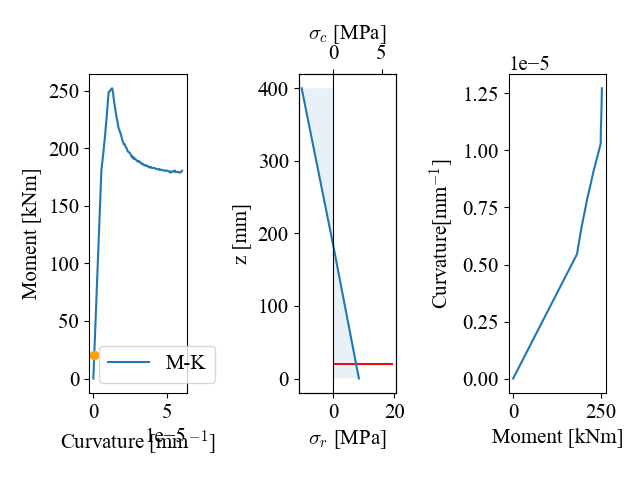

In [3]:
mc = MKappa(low_kappa = 0, high_kappa = 0.00006)
bl1 = make_reinforcement_layer(mc,material='steel',z=20,A=6*np.pi*8**2,E_reinforcement=200000,f_sy=400)
mc.interact()

## Load-deflection (beam level)

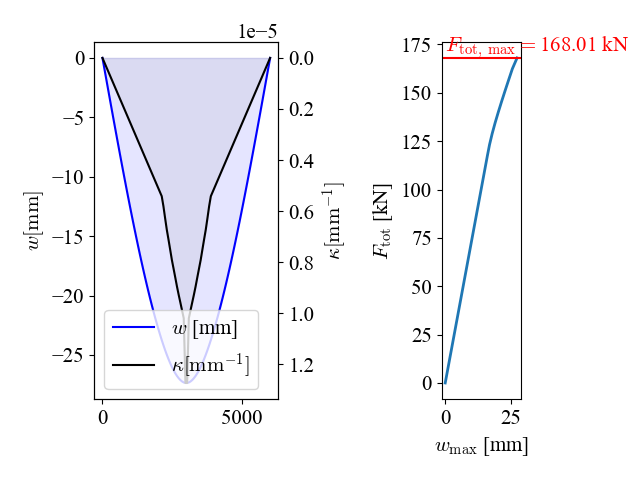

In [4]:
dp = DeflectionProfile(mc = mc)
dp.interact()

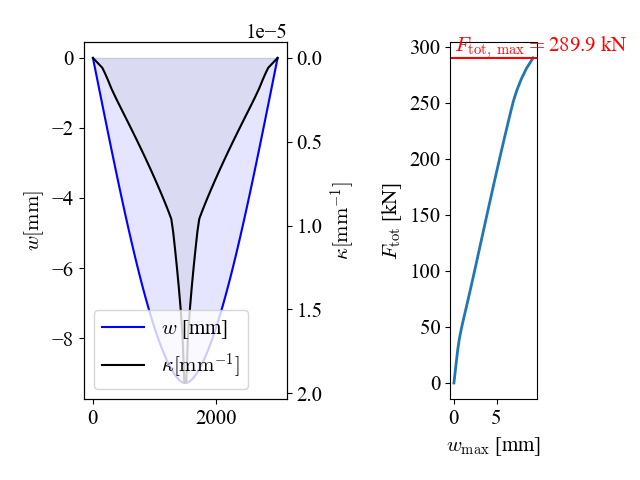

In [5]:
mc = MKappa(low_kappa = 0, high_kappa = 0.00006)

bl1 = make_reinforcement_layer(mc,material='steel',z=20,A=6*np.pi*8**2,E_reinforcement=200000,f_sy=400)
bl2 = make_reinforcement_layer(mc,material='carbon',z=40,A=2*np.pi*8**2,E_reinforcement=160000,f_t=1890)

mc.cs_design.matrix= 'EC2'
# mc.cs_design.matrix= 'EC2 with plateau'
# mc.cs_design.matrix_.trait_set(f_cm = 30, factor=1)

dp = DeflectionProfile(mc = mc)
dp.beam_design.system_.L = 3000
dp.beam_design.system = '3pb'
# dp.beam_design.system = 'simple_beam_dist_load'
# dp.beam_design.system = 'cantilever_dist_load'

dp.interact()

## Parametric study

Parametric study is running...
L: 3000, 5000, 6000, 
Parametric study finished.


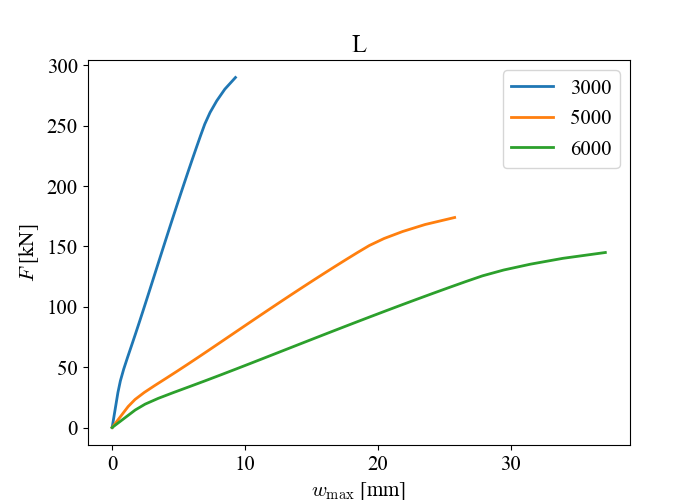

In [6]:
ps = LoadDeflectionParamsStudy(dp)
params_config = [
        ['L', dp.beam_design.system_, [3000, 5000, 6000]],
]
ps.run(params_config)
pass